In [2]:
## Import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import shap
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.stats import sem, t
import warnings

/Users/christophhau/Desktop/Research_case/venv2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Analysis of Llama 70b fine tuned

Data shape: (5000, 42)
Number of persona dimensions: 21
Persona dimensions:
- persona_brevity_style
- persona_language_formality
- persona_narrative_voice
- persona_vocabulary_range
- persona_punctuation_style
- persona_controversy_handling
- persona_community_role
- persona_content_triggers
- persona_reaction_patterns
- persona_message_effectiveness
- persona_opinion_expression
- persona_emotional_expression
- persona_cognitive_patterns
- persona_social_orientation
- persona_conflict_approach
- persona_value_signals
- persona_identity_projection
- persona_belief_expression
- persona_stress_indicators
- persona_adaptability_signs
- persona_authenticity_markers

Missing values:
Series([], dtype: int64)

Evaluation metrics statistics:


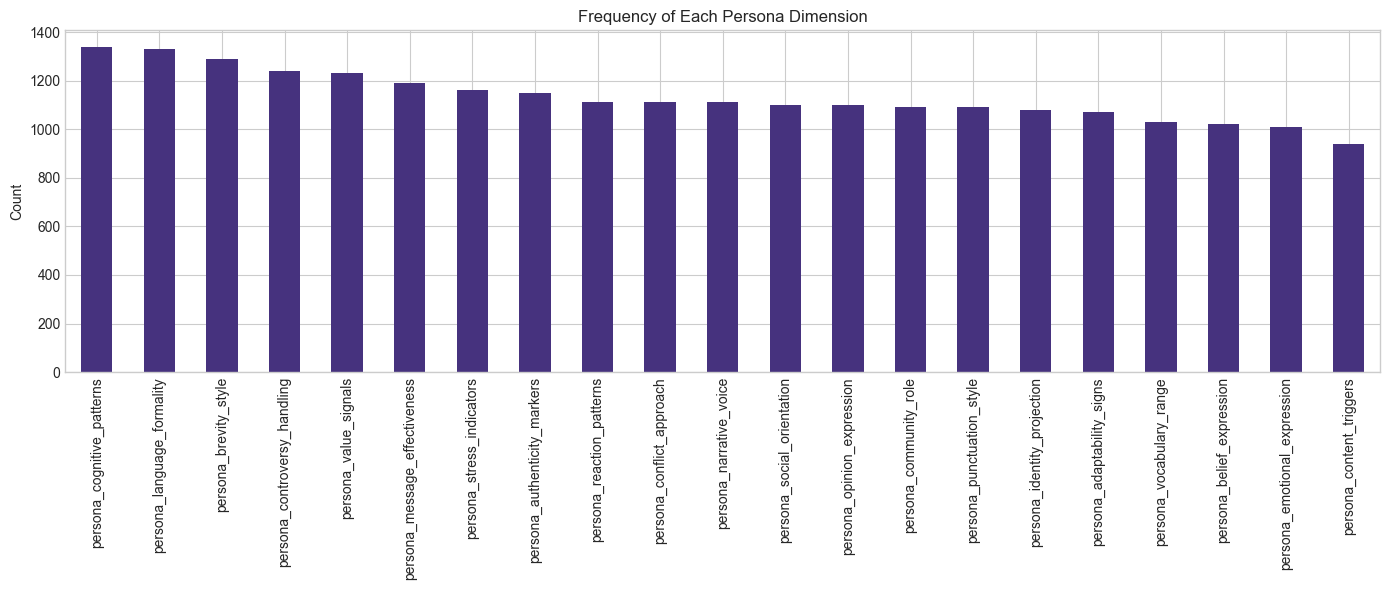


Analyzing similarity_scores...
MSE: 0.0025
R²: 0.4694

Analyzing rouge1_fmeasure...
MSE: 0.0119
R²: 0.5234

Analyzing rouge2_fmeasure...
MSE: 0.0088
R²: 0.4926

Analyzing rougel_fmeasure...
MSE: 0.0108
R²: 0.4800

Analyzing llm_evaluation_authenticity...
MSE: 2.6718
R²: 0.4321

Analyzing llm_evaluation_style_consistency...
MSE: 2.5167
R²: 0.4444

Analyzing llm_evaluation_matching_intent...
MSE: 0.0942
R²: 0.4382


<Figure size 1200x800 with 0 Axes>

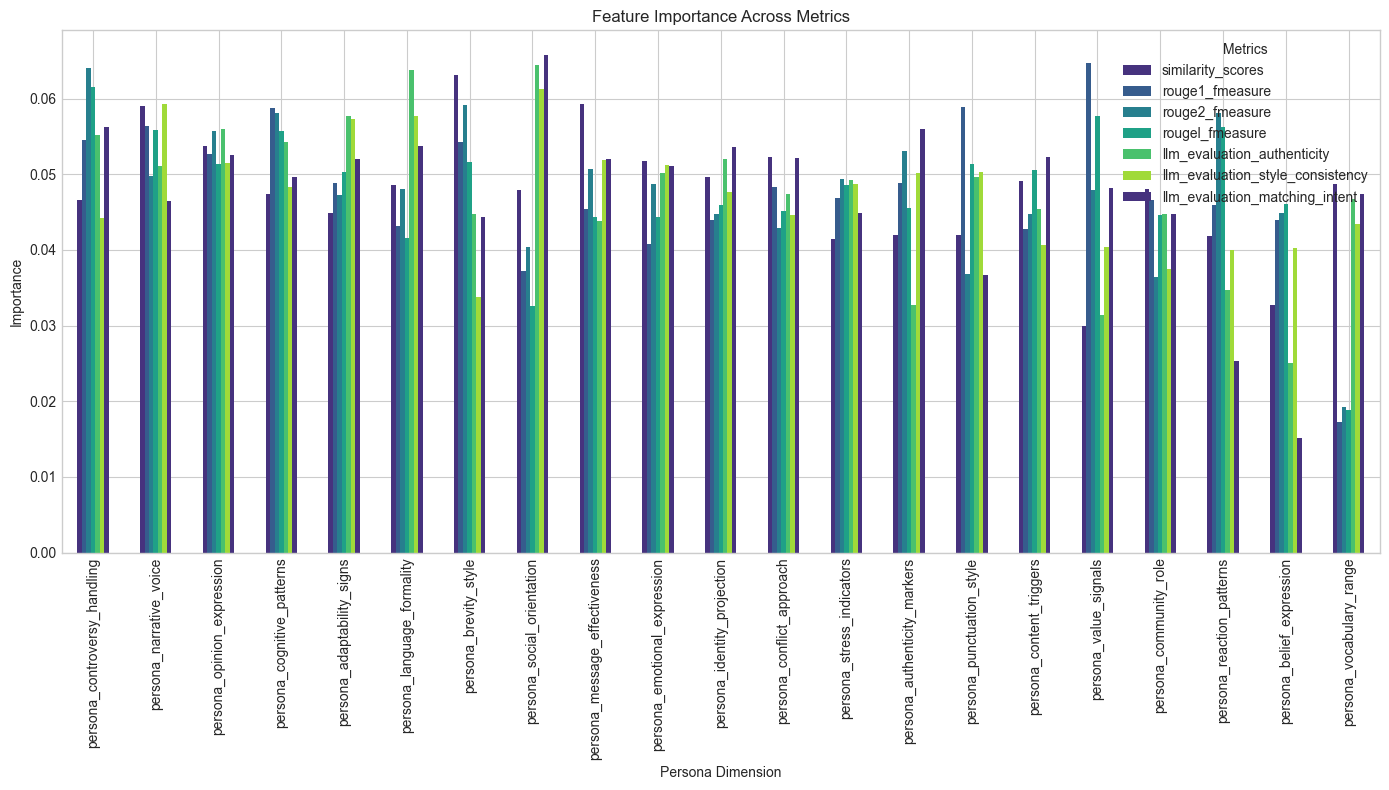

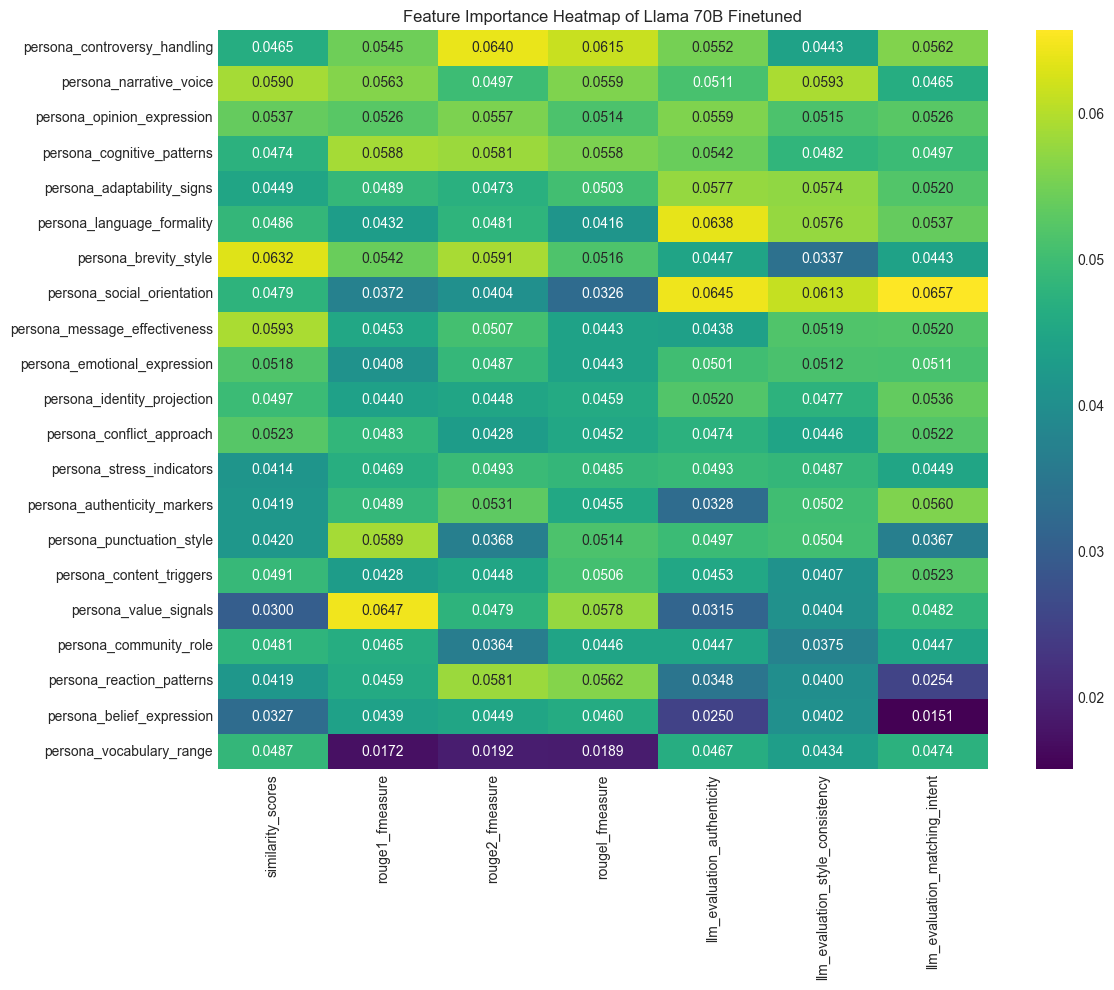


Calculating permutation importance for similarity_scores...
                              MDI_Importance  Permutation_Importance
persona_value_signals               0.029958                0.154815
persona_controversy_handling        0.046538                0.139461
persona_cognitive_patterns          0.047410                0.125044
persona_punctuation_style           0.041952                0.076593
persona_belief_expression           0.032743                0.072440

Calculating permutation importance for rouge1_fmeasure...
                              MDI_Importance  Permutation_Importance
persona_vocabulary_range            0.017201                0.308632
persona_emotional_expression        0.040791                0.144700
persona_value_signals               0.064700                0.131901
persona_social_orientation          0.037217                0.117582
persona_controversy_handling        0.054535                0.094062

Calculating permutation importance for rouge2_fmeas

<Figure size 1200x800 with 0 Axes>

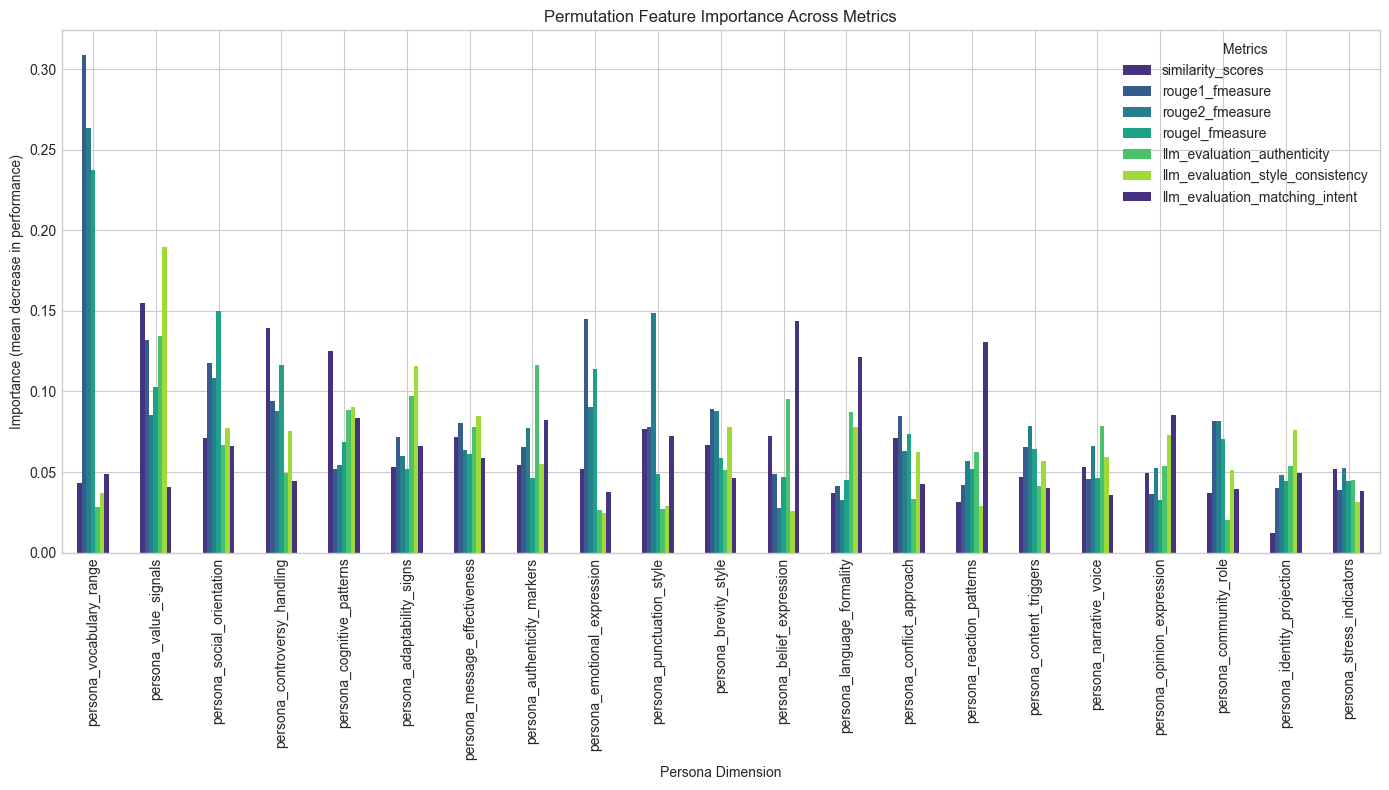

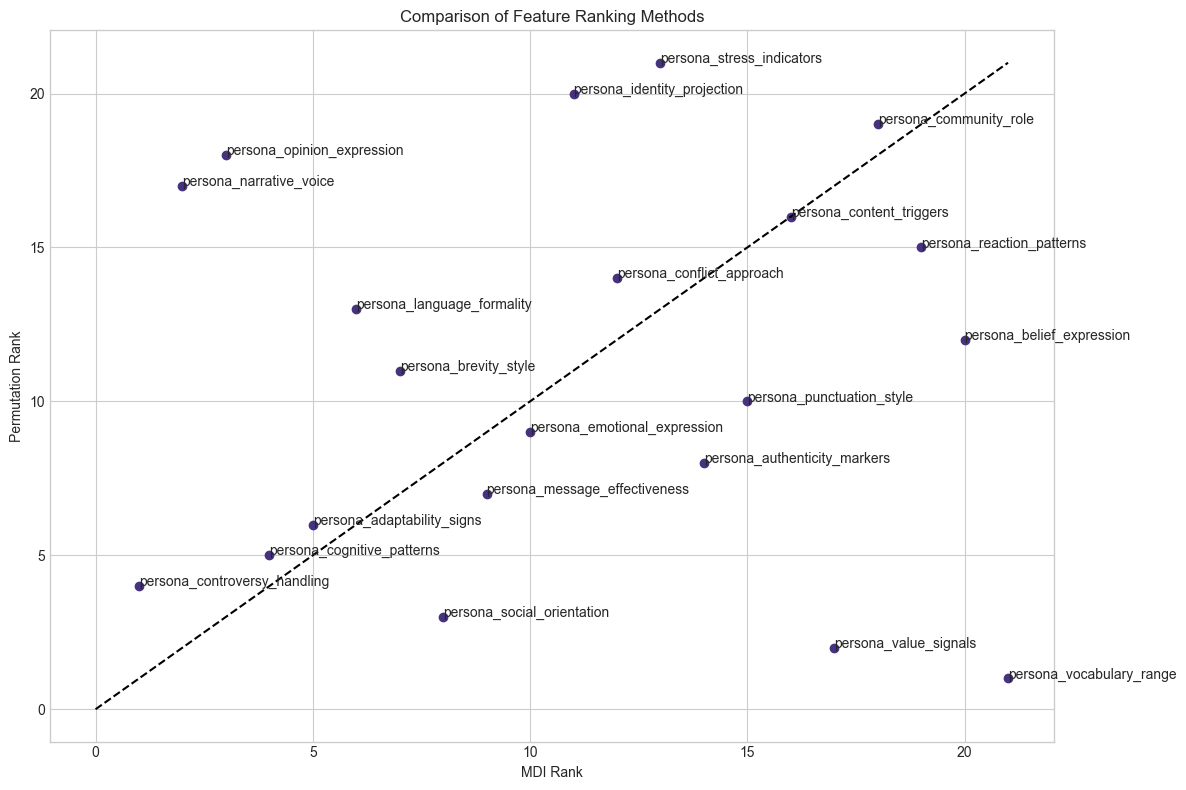


Performing SHAP analysis for rouge1_fmeasure (highest R²)...


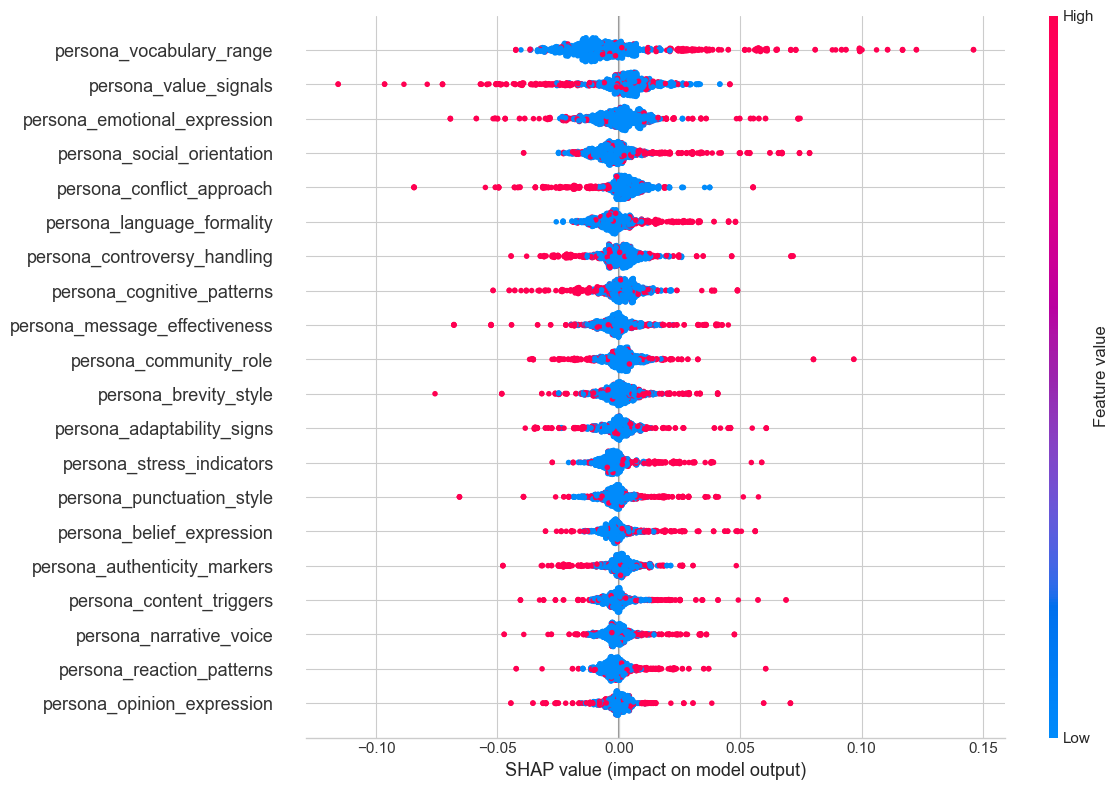

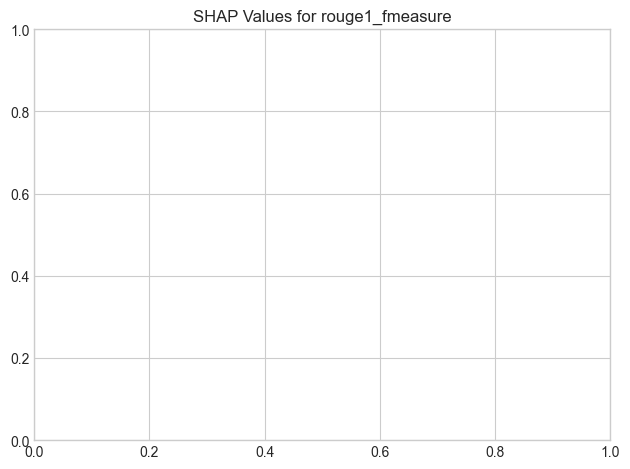


Dimensions with consistent high importance (high avg, low CV):
                               average        cv  importance_rank  \
persona_opinion_expression    0.053338  0.035125              3.0   
persona_narrative_voice       0.053963  0.091049              2.0   
persona_cognitive_patterns    0.053183  0.088845              4.0   
persona_controversy_handling  0.054620  0.131829              1.0   
persona_identity_projection   0.048223  0.075784             11.0   

                              consistency_rank  overall_score  
persona_opinion_expression                 1.0            4.0  
persona_narrative_voice                    7.0            9.0  
persona_cognitive_patterns                 6.0           10.0  
persona_controversy_handling              12.0           13.0  
persona_identity_projection                3.0           14.0  


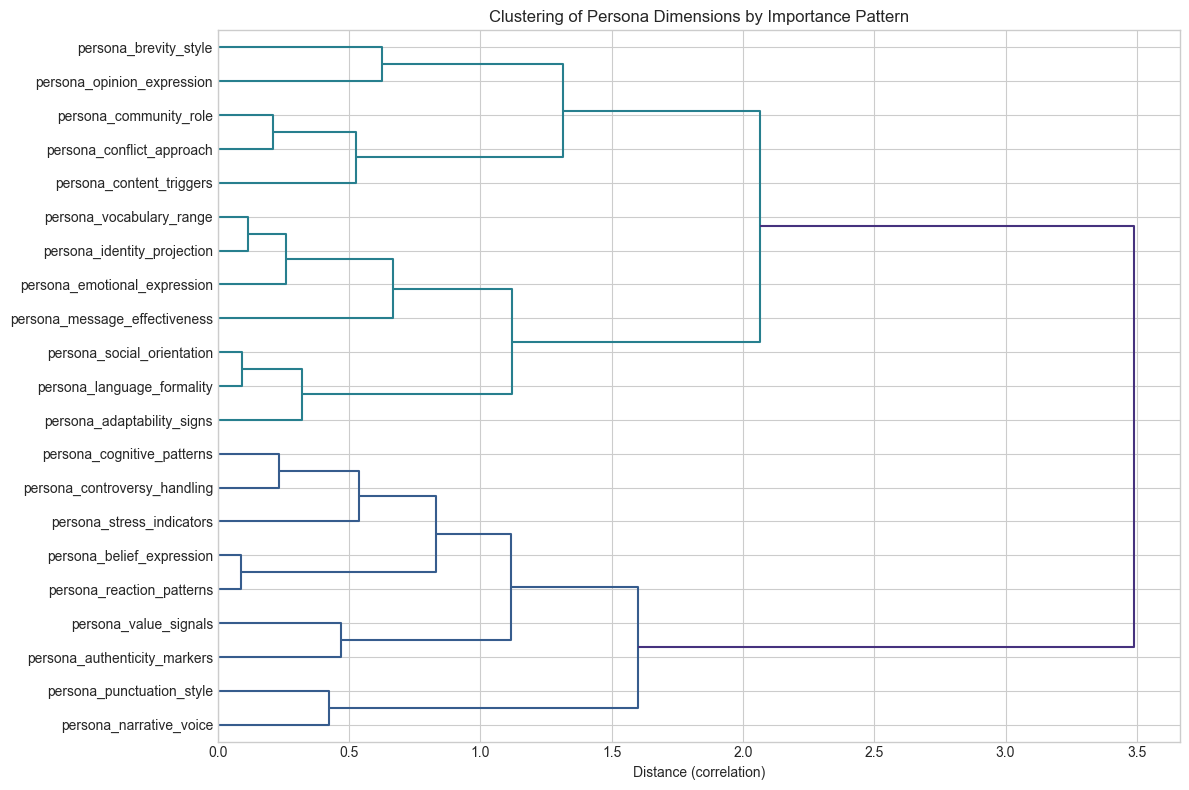


Bootstrap confidence intervals for top dimensions:

Metric: similarity_scores
persona_controversy_handling: 0.0455 [0.0320, 0.0594]
persona_narrative_voice: 0.0576 [0.0484, 0.0673]
persona_opinion_expression: 0.0530 [0.0453, 0.0624]
persona_cognitive_patterns: 0.0549 [0.0268, 0.0758]
persona_adaptability_signs: 0.0449 [0.0310, 0.0563]

Metric: rouge1_fmeasure
persona_controversy_handling: 0.0559 [0.0439, 0.0669]
persona_narrative_voice: 0.0562 [0.0452, 0.0669]
persona_opinion_expression: 0.0525 [0.0407, 0.0636]
persona_cognitive_patterns: 0.0561 [0.0472, 0.0655]
persona_adaptability_signs: 0.0506 [0.0409, 0.0590]

Metric: rouge2_fmeasure
persona_controversy_handling: 0.0620 [0.0485, 0.0767]
persona_narrative_voice: 0.0479 [0.0343, 0.0596]
persona_opinion_expression: 0.0576 [0.0423, 0.0771]
persona_cognitive_patterns: 0.0601 [0.0485, 0.0766]
persona_adaptability_signs: 0.0467 [0.0377, 0.0583]

Metric: rougel_fmeasure
persona_controversy_handling: 0.0594 [0.0423, 0.0757]
persona_narrati

KeyboardInterrupt: 

In [6]:
## Comprehensive Analysis of Persona Dimensions Importance

warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 1. Load the data
df = pd.read_csv("/Users/christophhau/Desktop/Research_case/results/fine_tuned_llama/1kx5_llama_rnd_shuffled_personas.csv")
print(f"Data shape: {df.shape}")
df.head(3)

# 2. Identify persona dimensions
persona_cols = [col for col in df.columns if col.startswith('persona_') and col != 'persona_general_decription']
print(f"Number of persona dimensions: {len(persona_cols)}")
print("Persona dimensions:")
for col in persona_cols:
    print(f"- {col}")

# 3. Identify evaluation metrics
eval_metrics = ['similarity_scores', 'rouge1_fmeasure', 'rouge2_fmeasure', 
                'rougel_fmeasure' , 'llm_evaluation_authenticity','llm_evaluation_style_consistency','llm_evaluation_matching_intent']
# If you have LLM evaluation metrics in this dataset, you can add them here

# 4. Convert boolean persona columns to numerical (True=1, False=0)
for col in persona_cols:
    df[col] = df[col].map({True: 1, False: 0})

# 5. Check for missing values
missing_data = df[persona_cols + eval_metrics].isnull().sum()
print("\nMissing values:")
print(missing_data[missing_data > 0])

# 6. Get basic statistics for the evaluation metrics
print("\nEvaluation metrics statistics:")
df[eval_metrics].describe()

# 7. Distribution of persona dimensions
plt.figure(figsize=(14, 6))
df[persona_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of Each Persona Dimension')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 8. Define a function to run Random Forest and get feature importance for each metric
def get_feature_importance(df, feature_cols, target_col):
    X = df[feature_cols]
    y = df[target_col]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Get predictions
    y_pred = rf.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importance
    importance = rf.feature_importances_
    
    # Return results
    return {
        'model': rf,
        'X_test': X_test,
        'importance': importance,
        'mse': mse,
        'r2': r2
    }

# 9. Run analysis for all metrics
results = {}
for metric in eval_metrics:
    print(f"\nAnalyzing {metric}...")
    results[metric] = get_feature_importance(df, persona_cols, metric)
    print(f"MSE: {results[metric]['mse']:.4f}")
    print(f"R²: {results[metric]['r2']:.4f}")




# 10. Create a DataFrame with feature importances for all metrics
importance_df = pd.DataFrame()
for metric in eval_metrics:
    importance_df[metric] = results[metric]['importance']
    
importance_df.index = persona_cols
importance_df['average'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values('average', ascending=False)

# 11. Visualize feature importances across metrics
plt.figure(figsize=(12, 8))
importance_df.drop('average', axis=1).plot(kind='bar', figsize=(14, 8))
plt.title('Feature Importance Across Metrics')
plt.ylabel('Importance')
plt.xlabel('Persona Dimension')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# 12. Heatmap of feature importances
plt.figure(figsize=(12, 10))
sns.heatmap(importance_df.drop('average', axis=1), annot=True, fmt='.4f', cmap='viridis')
plt.title('Feature Importance Heatmap of Llama 70B Finetuned')
plt.tight_layout()
plt.show()

from sklearn.inspection import permutation_importance

# Add to your notebook after the Random Forest analysis
# Calculate permutation importance for each metric
perm_results = {}
for metric in eval_metrics:
    print(f"\nCalculating permutation importance for {metric}...")
    model = results[metric]['model']
    X_test = results[metric]['X_test']
    y_test = df.loc[X_test.index, metric]
    
    # Calculate permutation importance
    perm_imp = permutation_importance(model, X_test, y_test, 
                                      n_repeats=10, random_state=42)
    
    perm_results[metric] = perm_imp.importances_mean
    
    # Compare with MDI importance
    comp_df = pd.DataFrame({
        'MDI_Importance': results[metric]['importance'],
        'Permutation_Importance': perm_imp.importances_mean
    }, index=persona_cols)
    
    comp_df = comp_df.sort_values('Permutation_Importance', ascending=False)
    print(comp_df.head(5))

# Create permutation importance DataFrame
perm_importance_df = pd.DataFrame()
for metric in eval_metrics:
    perm_importance_df[metric] = perm_results[metric]
    
perm_importance_df.index = persona_cols
perm_importance_df['average'] = perm_importance_df.mean(axis=1)
perm_importance_df = perm_importance_df.sort_values('average', ascending=False)

# Visualize permutation importance
plt.figure(figsize=(12, 8))
perm_importance_df.drop('average', axis=1).plot(kind='bar', figsize=(14, 8))
plt.title('Permutation Feature Importance Across Metrics')
plt.ylabel('Importance (mean decrease in performance)')
plt.xlabel('Persona Dimension')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# Compare MDI and permutation importance rankings
comparison = pd.DataFrame({
    'MDI_Rank': importance_df['average'].rank(ascending=False),
    'Permutation_Rank': perm_importance_df['average'].rank(ascending=False)
})
comparison['Rank_Difference'] = comparison['MDI_Rank'] - comparison['Permutation_Rank']
comparison = comparison.sort_values('MDI_Rank')

plt.figure(figsize=(12, 8))
plt.scatter(comparison['MDI_Rank'], comparison['Permutation_Rank'])
for idx, row in comparison.iterrows():
    plt.annotate(idx, (row['MDI_Rank'], row['Permutation_Rank']))
    
# Add diagonal line (perfect agreement)
max_rank = max(comparison['MDI_Rank'].max(), comparison['Permutation_Rank'].max())
plt.plot([0, max_rank], [0, max_rank], 'k--')
plt.xlabel('MDI Rank')
plt.ylabel('Permutation Rank')
plt.title('Comparison of Feature Ranking Methods')
plt.tight_layout()
plt.show()

# 13. SHAP analysis for the most important metric (highest R²)
best_metric = max(results, key=lambda x: results[x]['r2'])
print(f"\nPerforming SHAP analysis for {best_metric} (highest R²)...")

explainer = shap.TreeExplainer(results[best_metric]['model'])
shap_values = explainer(results[best_metric]['X_test'])

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, results[best_metric]['X_test'], plot_size=(12, 8))
plt.title(f'SHAP Values for {best_metric}')
plt.tight_layout()
plt.show()

# 14. Calculate consistency of importance across metrics
importance_df['std'] = importance_df.drop(['average', 'std'], axis=1, errors='ignore').std(axis=1)
importance_df['cv'] = importance_df['std'] / importance_df['average']  # Coefficient of variation

# 15. Dimensions with consistent high importance
print("\nDimensions with consistent high importance (high avg, low CV):")
consistency_df = importance_df[['average', 'cv']].copy()
consistency_df['importance_rank'] = consistency_df['average'].rank(ascending=False)
consistency_df['consistency_rank'] = consistency_df['cv'].rank()
consistency_df['overall_score'] = consistency_df['importance_rank'] + consistency_df['consistency_rank']
consistency_df = consistency_df.sort_values('overall_score')
print(consistency_df.head(5))

# 16. Dimension clustering based on impact patterns
# Transpose to get metrics as rows and dimensions as columns
importance_patterns = importance_df.drop(['average', 'std', 'cv'], axis=1, errors='ignore').T

# Calculate correlation distance
corr_distance = pdist(importance_patterns.T, 'correlation')

# Hierarchical clustering
linkage = hierarchy.linkage(corr_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(
    linkage,
    labels=importance_patterns.columns,
    orientation='right'
)
plt.title('Clustering of Persona Dimensions by Importance Pattern')
plt.xlabel('Distance (correlation)')
plt.tight_layout()
plt.show()

# 17. Bootstrap confidence intervals for top 5 dimensions
top_dimensions = importance_df.index[:5].tolist()
print("\nBootstrap confidence intervals for top dimensions:")

n_bootstrap = 1000
alpha = 0.05  # 95% confidence interval

for metric in eval_metrics:
    print(f"\nMetric: {metric}")
    X = df[persona_cols]
    y = df[metric]
    
    bootstrap_importances = []
    
    for _ in range(n_bootstrap):
        # Sample with replacement
        indices = np.random.choice(len(X), len(X), replace=True)
        X_sample, y_sample = X.iloc[indices], y.iloc[indices]
        
        # Train model
        rf = RandomForestRegressor(n_estimators=50, random_state=None)
        rf.fit(X_sample, y_sample)
        
        # Store importances
        bootstrap_importances.append(rf.feature_importances_)
    
    # Convert to DataFrame
    bootstrap_df = pd.DataFrame(bootstrap_importances, columns=persona_cols)
    
    # Calculate confidence intervals
    for dim in top_dimensions:
        mean = bootstrap_df[dim].mean()
        ci_lower = np.percentile(bootstrap_df[dim], alpha/2 * 100)
        ci_upper = np.percentile(bootstrap_df[dim], (1-alpha/2) * 100)
        print(f"{dim}: {mean:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

# 18. Calculate correlation between dimensions (to identify redundancy)
dim_corr = df[persona_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(dim_corr, dtype=bool))
sns.heatmap(dim_corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Between Persona Dimensions')
plt.tight_layout()
plt.show()

# 19. Summary: Top 5 dimensions overall
print("\nTop 5 most important persona dimensions (average across all metrics):")
for i, (dim, row) in enumerate(importance_df.head(5).iterrows(), 1):
    print(f"{i}. {dim}: {row['average']:.4f}")

# 20. Threshold-based classification of dimensions
threshold = importance_df['average'].mean() + 0.5 * importance_df['average'].std()
important_dims = importance_df[importance_df['average'] >= threshold]

print(f"\nDimensions above importance threshold ({threshold:.4f}):")
for dim, row in important_dims.iterrows():
    print(f"- {dim}: {row['average']:.4f}")

## SHap for all metrics


Data shape: (5000, 42)
Number of persona dimensions: 21
Persona dimensions:
- persona_brevity_style
- persona_language_formality
- persona_narrative_voice
- persona_vocabulary_range
- persona_punctuation_style
- persona_controversy_handling
- persona_community_role
- persona_content_triggers
- persona_reaction_patterns
- persona_message_effectiveness
- persona_opinion_expression
- persona_emotional_expression
- persona_cognitive_patterns
- persona_social_orientation
- persona_conflict_approach
- persona_value_signals
- persona_identity_projection
- persona_belief_expression
- persona_stress_indicators
- persona_adaptability_signs
- persona_authenticity_markers

Missing values:
Series([], dtype: int64)

Evaluation metrics statistics:

Analyzing similarity_scores...
MSE: 0.0025
R²: 0.4694

Analyzing rouge1_fmeasure...
MSE: 0.0119
R²: 0.5234

Analyzing rouge2_fmeasure...
MSE: 0.0088
R²: 0.4926

Analyzing rougel_fmeasure...
MSE: 0.0108
R²: 0.4800

Analyzing llm_evaluation_authenticity...
M

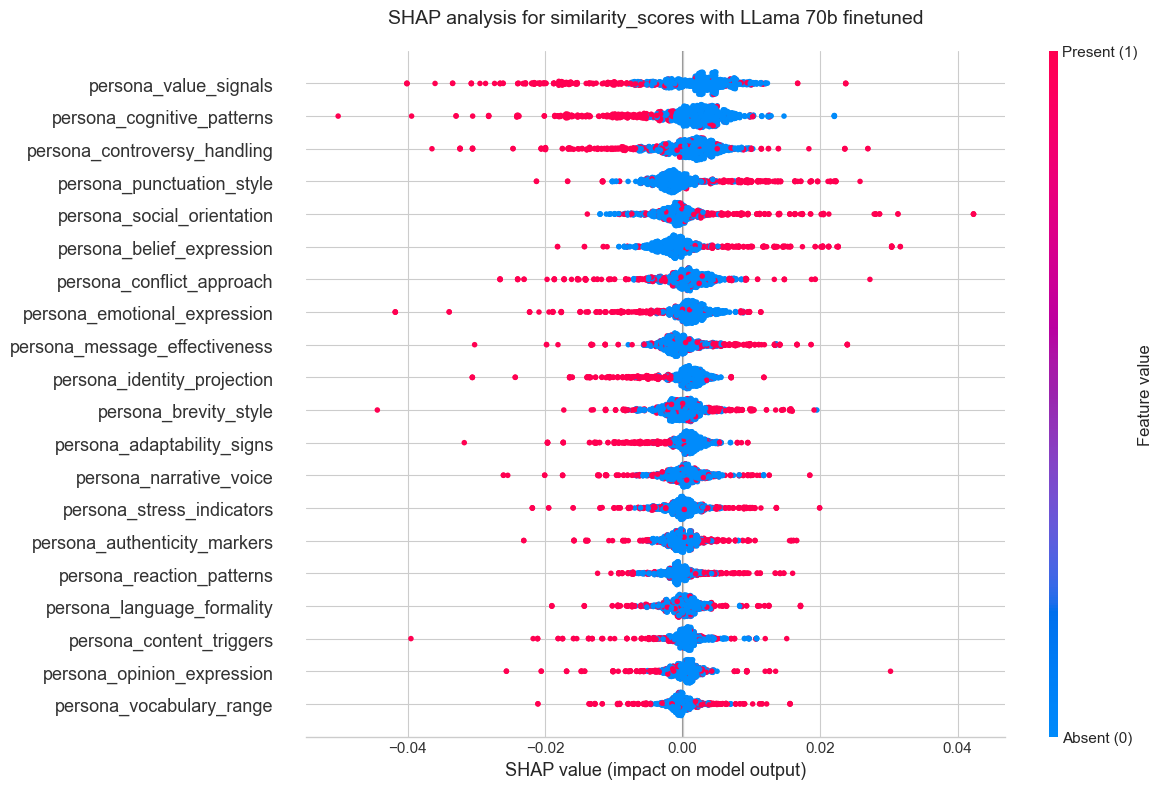

\SHAP analysis for rouge1_fmeasure with LLama 70b finetuned


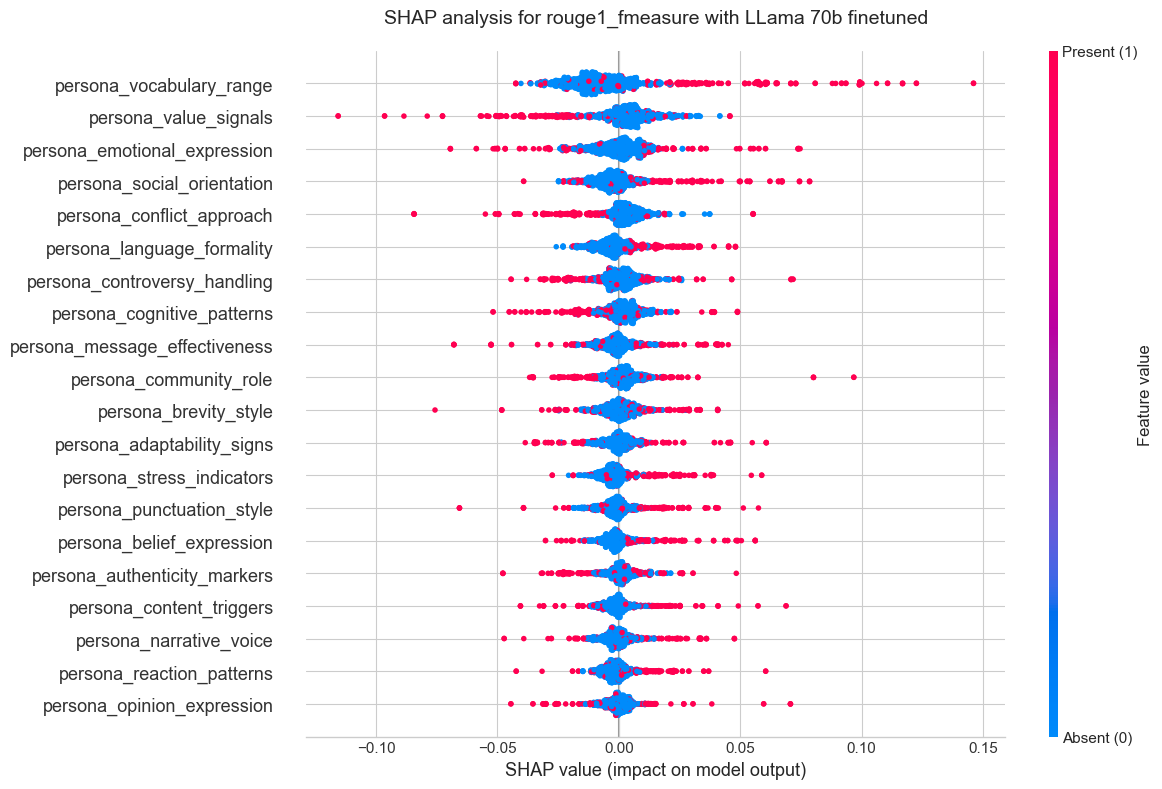

\SHAP analysis for rouge2_fmeasure with LLama 70b finetuned


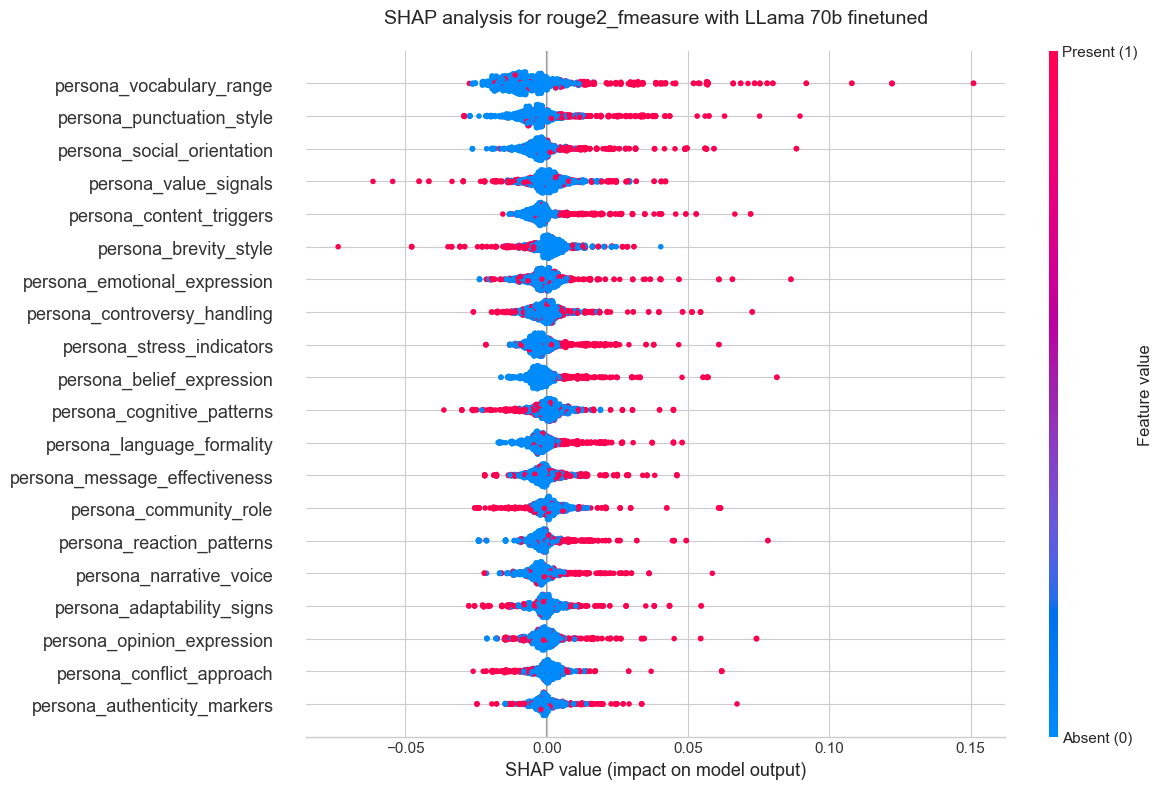

\SHAP analysis for rougel_fmeasure with LLama 70b finetuned


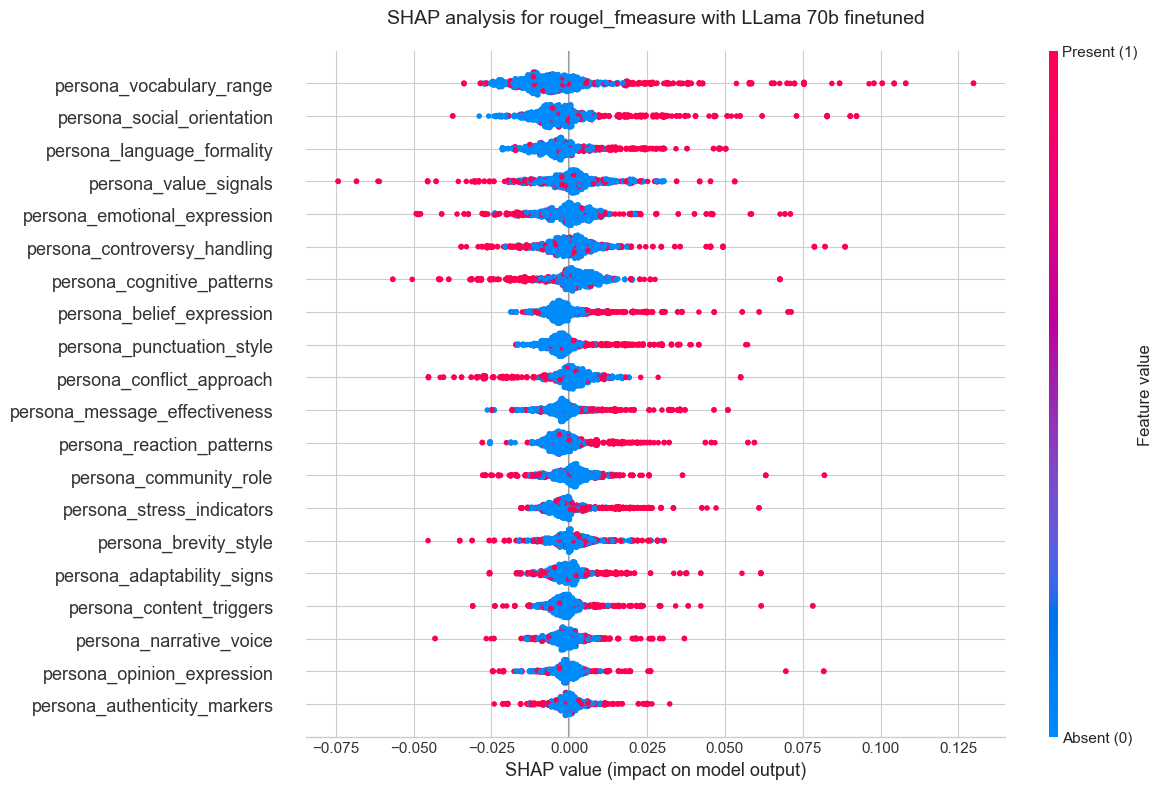

\SHAP analysis for llm_evaluation_authenticity with LLama 70b finetuned


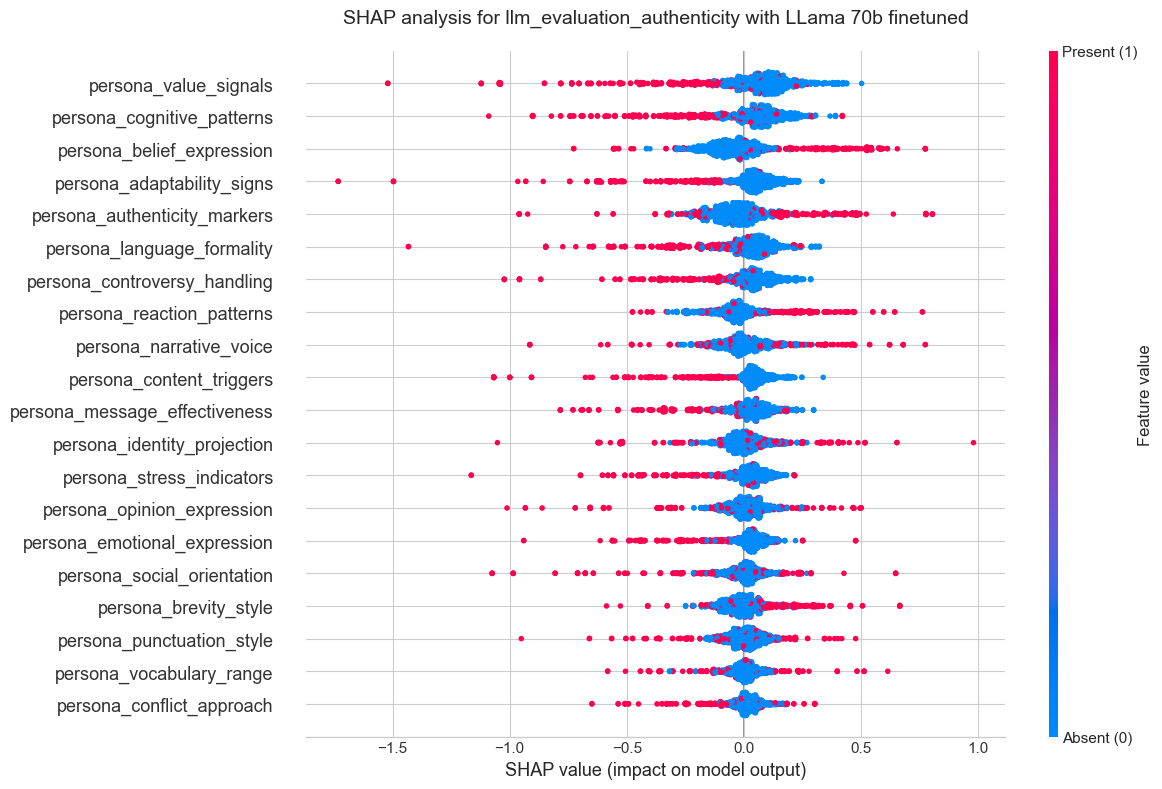

\SHAP analysis for llm_evaluation_style_consistency with LLama 70b finetuned


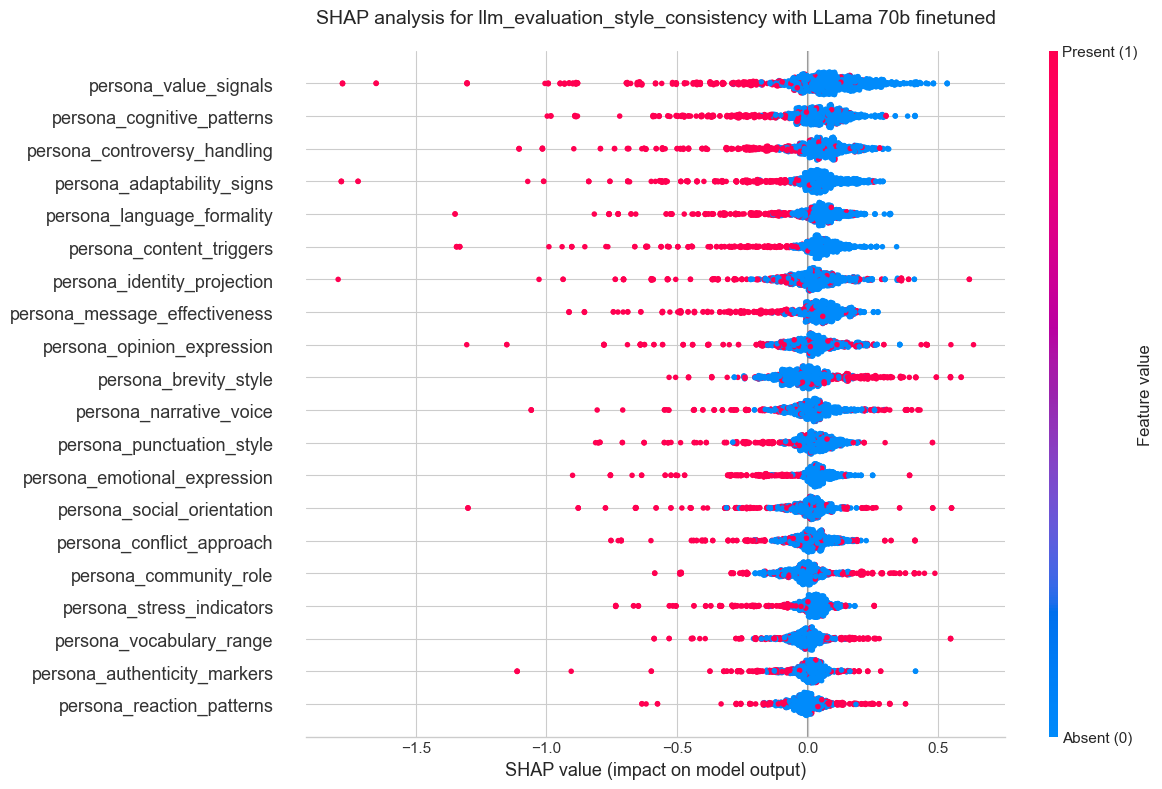

\SHAP analysis for llm_evaluation_matching_intent with LLama 70b finetuned


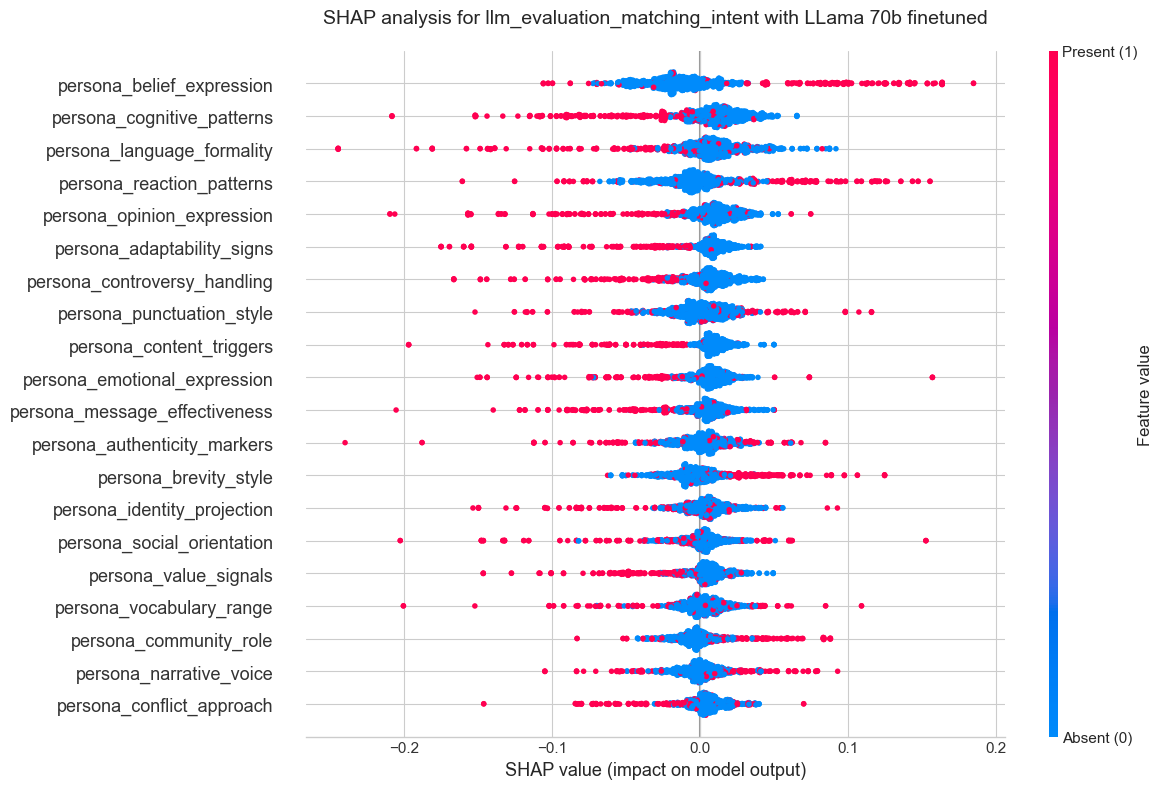

In [7]:
warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 1. Load the data
df = pd.read_csv("/Users/christophhau/Desktop/Research_case/results/fine_tuned_llama/1kx5_llama_rnd_shuffled_personas.csv")
print(f"Data shape: {df.shape}")
df.head(3) 

# 2. Identify persona dimensions
persona_cols = [col for col in df.columns if col.startswith('persona_') and col != 'persona_general_decription']
print(f"Number of persona dimensions: {len(persona_cols)}")
print("Persona dimensions:")
for col in persona_cols:
    print(f"- {col}")

# 3. Identify evaluation metrics
eval_metrics = ['similarity_scores', 'rouge1_fmeasure', 'rouge2_fmeasure', 
                'rougel_fmeasure' , 'llm_evaluation_authenticity','llm_evaluation_style_consistency','llm_evaluation_matching_intent']
# If you have LLM evaluation metrics in this dataset, you can add them here

# 4. Convert boolean persona columns to numerical (True=1, False=0)
for col in persona_cols:
    df[col] = df[col].map({True: 1, False: 0})

# 5. Check for missing values
missing_data = df[persona_cols + eval_metrics].isnull().sum()
print("\nMissing values:")
print(missing_data[missing_data > 0])

# 6. Get basic statistics for the evaluation metrics
print("\nEvaluation metrics statistics:")
df[eval_metrics].describe()



# 8. Define a function to run Random Forest and get feature importance for each metric
def get_feature_importance(df, feature_cols, target_col):
    X = df[feature_cols]
    y = df[target_col]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Get predictions
    y_pred = rf.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importance
    importance = rf.feature_importances_
    
    # Return results
    return {
        'model': rf,
        'X_test': X_test,
        'importance': importance,
        'mse': mse,
        'r2': r2
    }

# 9. Run analysis for all metrics
results = {}
for metric in eval_metrics:
    print(f"\nAnalyzing {metric}...")
    results[metric] = get_feature_importance(df, persona_cols, metric)
    print(f"MSE: {results[metric]['mse']:.4f}")
    print(f"R²: {results[metric]['r2']:.4f}")











# For each metric, create an improved SHAP plot
for metric in eval_metrics:
    print(f"\SHAP analysis for {metric} with LLama 70b finetuned")
    
    # Create the explainer
    explainer = shap.TreeExplainer(results[metric]['model'])
    shap_values = explainer(results[metric]['X_test'])
    
    # Create figure with proper size
    plt.figure(figsize=(12, 8))
    
    # Create custom summary plot with binary feature values
    shap.summary_plot(
        shap_values, 
        results[metric]['X_test'],
        plot_type="dot",
        plot_size=(12, 8),
        show=False  # Don't show yet so we can modify
    )
    
    # Add title directly to the current axis
    plt.gca().set_title(f"SHAP analysis for {metric} with LLama 70b finetuned", fontsize=14, pad=20)
    
    # Modify colorbar to show binary values
    cbar = plt.gcf().axes[-1]  # Get the colorbar axes
    cbar.set_yticklabels(['Absent (0)', 'Present (1)'])
    cbar.set_yticks([0, 1])
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

Data shape: (8000, 42)
Number of persona dimensions: 21
Persona dimensions:
- persona_brevity_style
- persona_language_formality
- persona_narrative_voice
- persona_vocabulary_range
- persona_punctuation_style
- persona_controversy_handling
- persona_community_role
- persona_content_triggers
- persona_reaction_patterns
- persona_message_effectiveness
- persona_opinion_expression
- persona_emotional_expression
- persona_cognitive_patterns
- persona_social_orientation
- persona_conflict_approach
- persona_value_signals
- persona_identity_projection
- persona_belief_expression
- persona_stress_indicators
- persona_adaptability_signs
- persona_authenticity_markers

Missing values:
Series([], dtype: int64)

Evaluation metrics statistics:


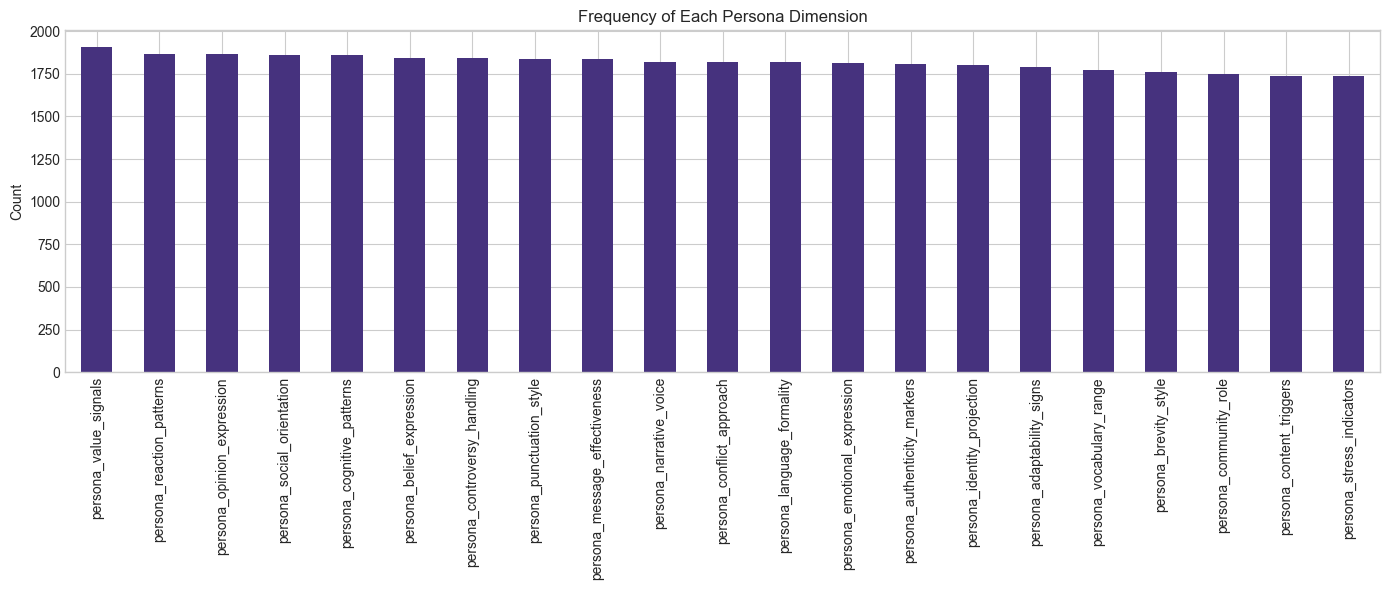


Analyzing similarity_scores...
MSE: 0.0052
R²: -0.0668

Analyzing rouge1_fmeasure...
MSE: 0.0118
R²: -0.0131

Analyzing rouge2_fmeasure...
MSE: 0.0056
R²: -0.0830

Analyzing rougel_fmeasure...
MSE: 0.0076
R²: -0.0476

Analyzing llm_evaluation_authenticity...
MSE: 2.1228
R²: -0.0516

Analyzing llm_evaluation_style_consistency...
MSE: 3.2115
R²: -0.0474

Analyzing llm_evaluation_matching_intent...
MSE: 0.2742
R²: -0.1568


<Figure size 1200x800 with 0 Axes>

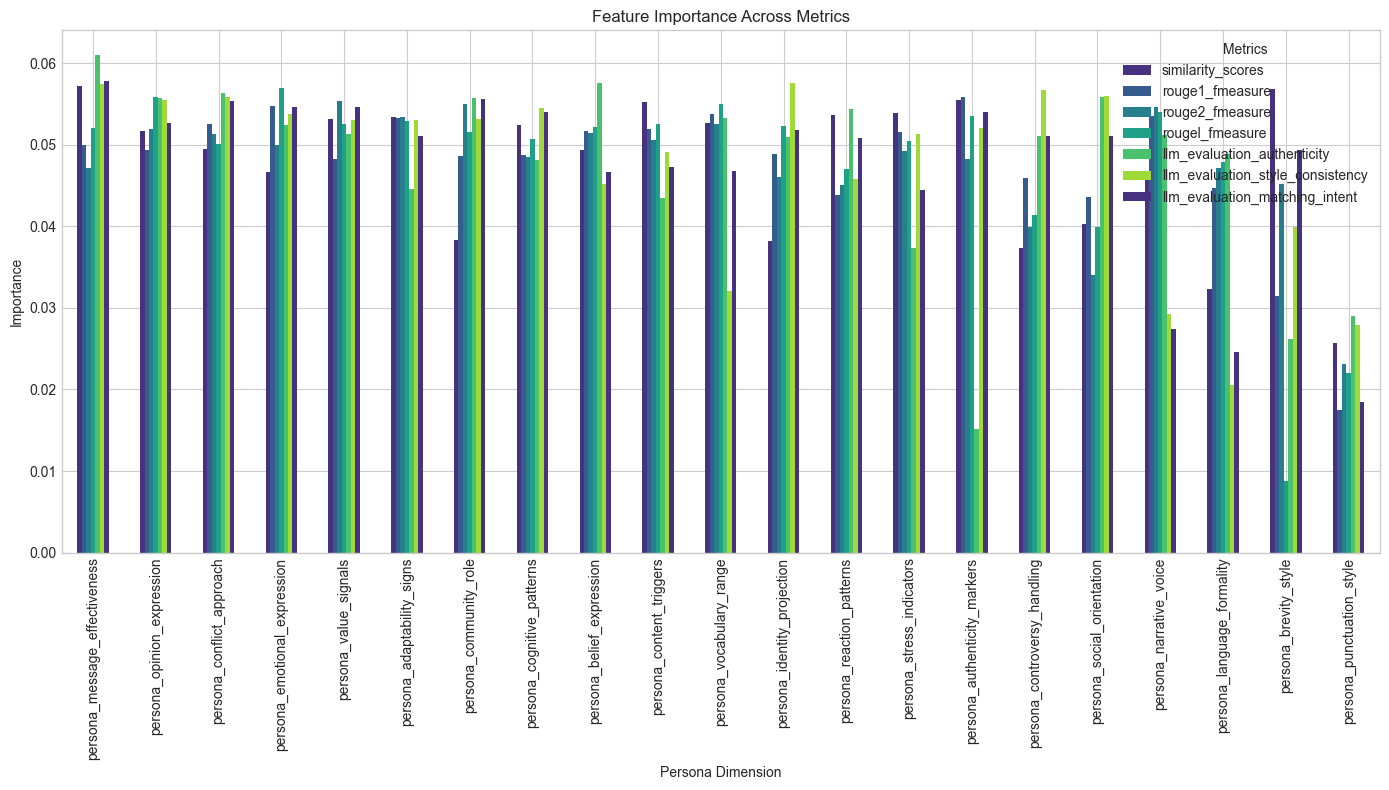

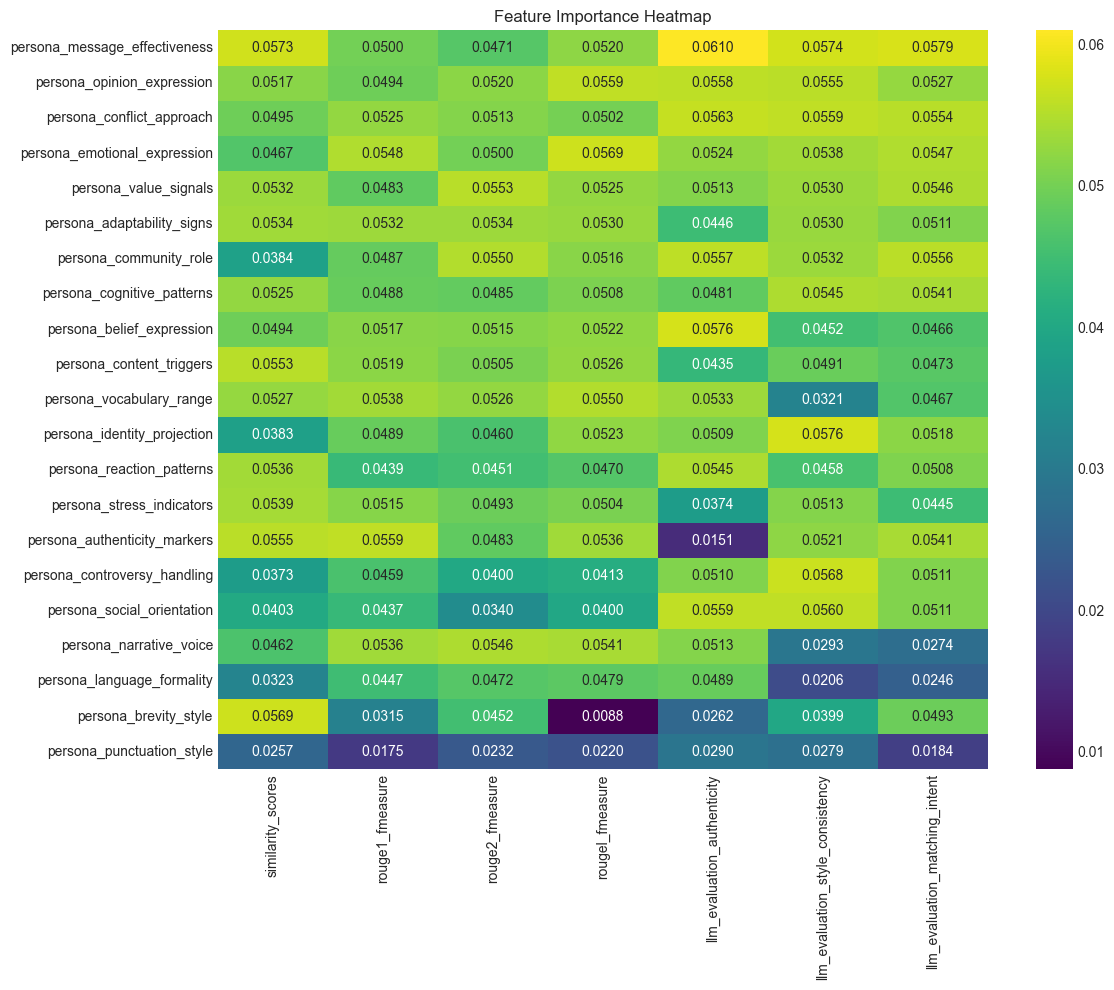


Calculating permutation importance for similarity_scores...
                             MDI_Importance  Permutation_Importance
persona_identity_projection        0.038261                0.011087
persona_brevity_style              0.056909                0.005393
persona_narrative_voice            0.046158                0.002268
persona_vocabulary_range           0.052718               -0.001036
persona_community_role             0.038362               -0.001734

Calculating permutation importance for rouge1_fmeasure...
                             MDI_Importance  Permutation_Importance
persona_punctuation_style          0.017472                0.037660
persona_adaptability_signs         0.053243                0.034127
persona_brevity_style              0.031490                0.029908
persona_identity_projection        0.048864                0.023597
persona_reaction_patterns          0.043873                0.023067

Calculating permutation importance for rouge2_fmeasure...
     

<Figure size 1200x800 with 0 Axes>

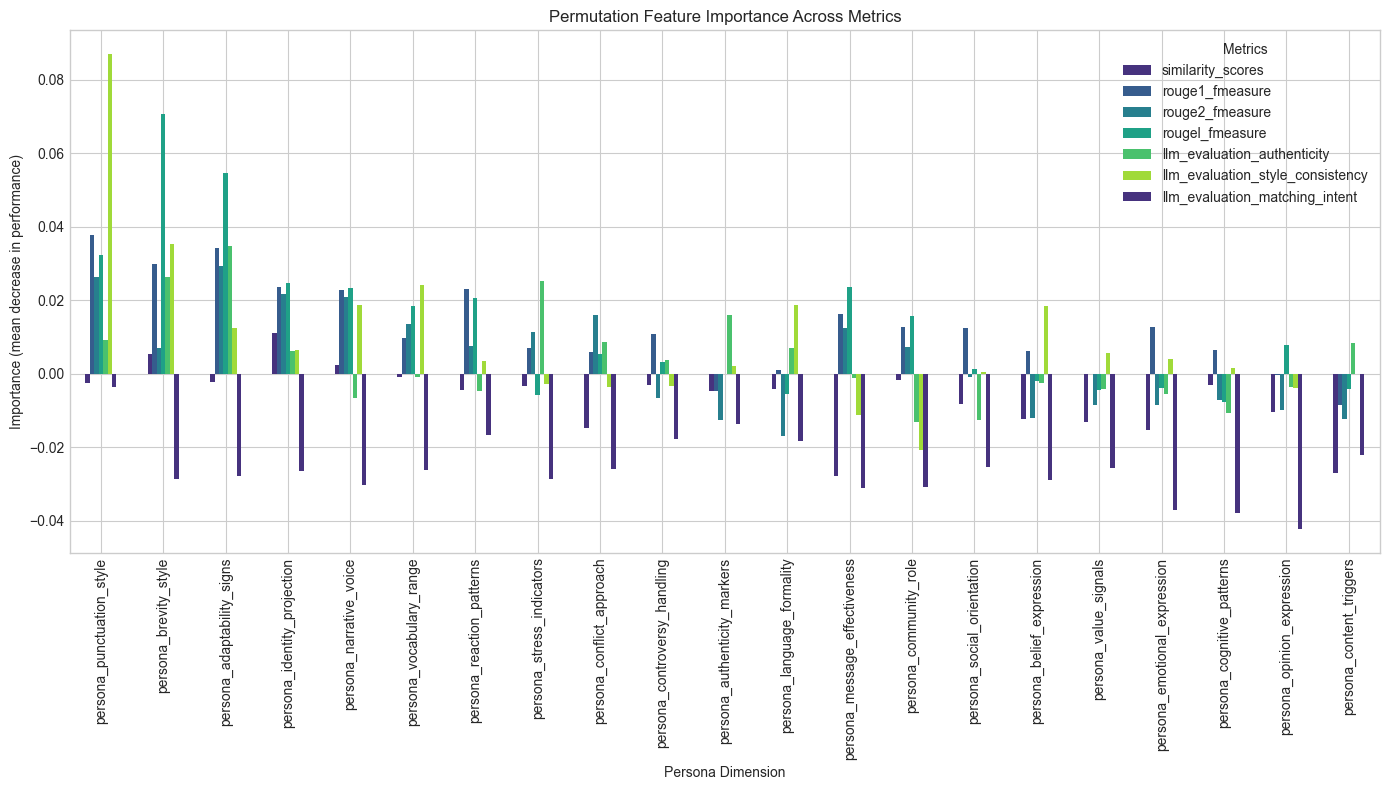

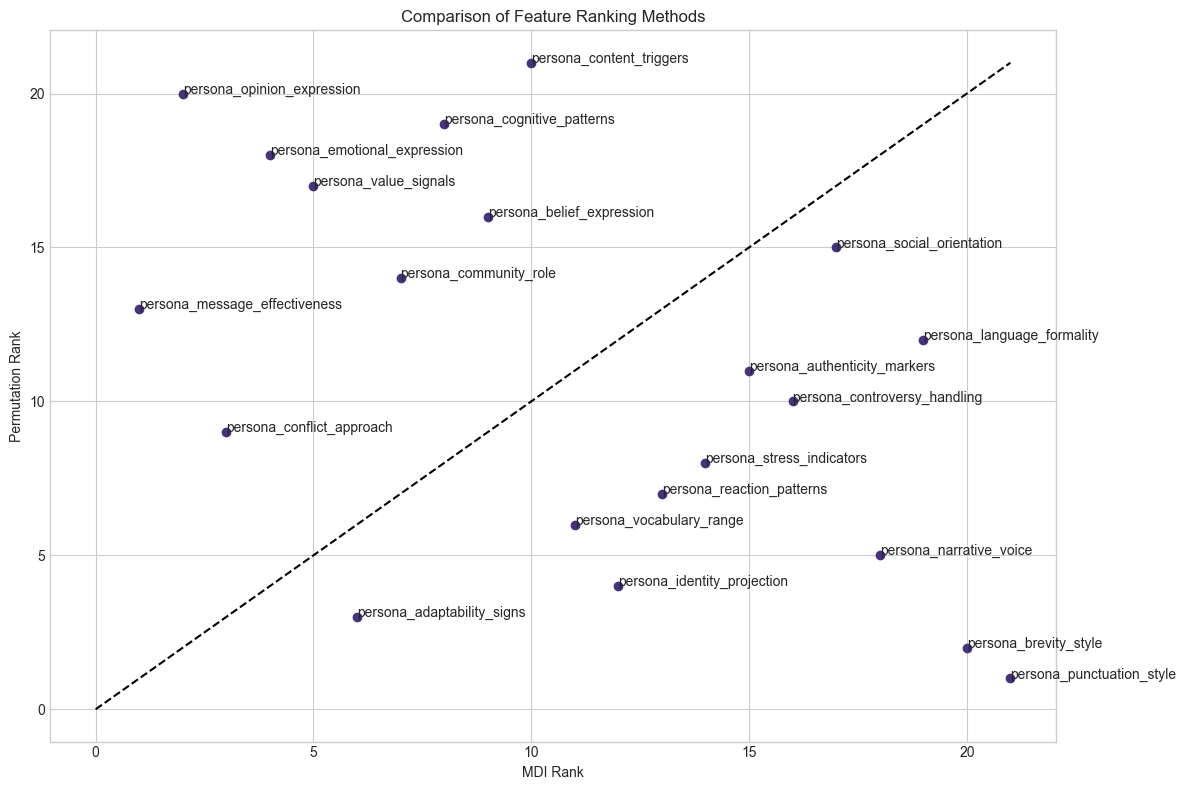


Performing SHAP analysis for rouge1_fmeasure (highest R²)...


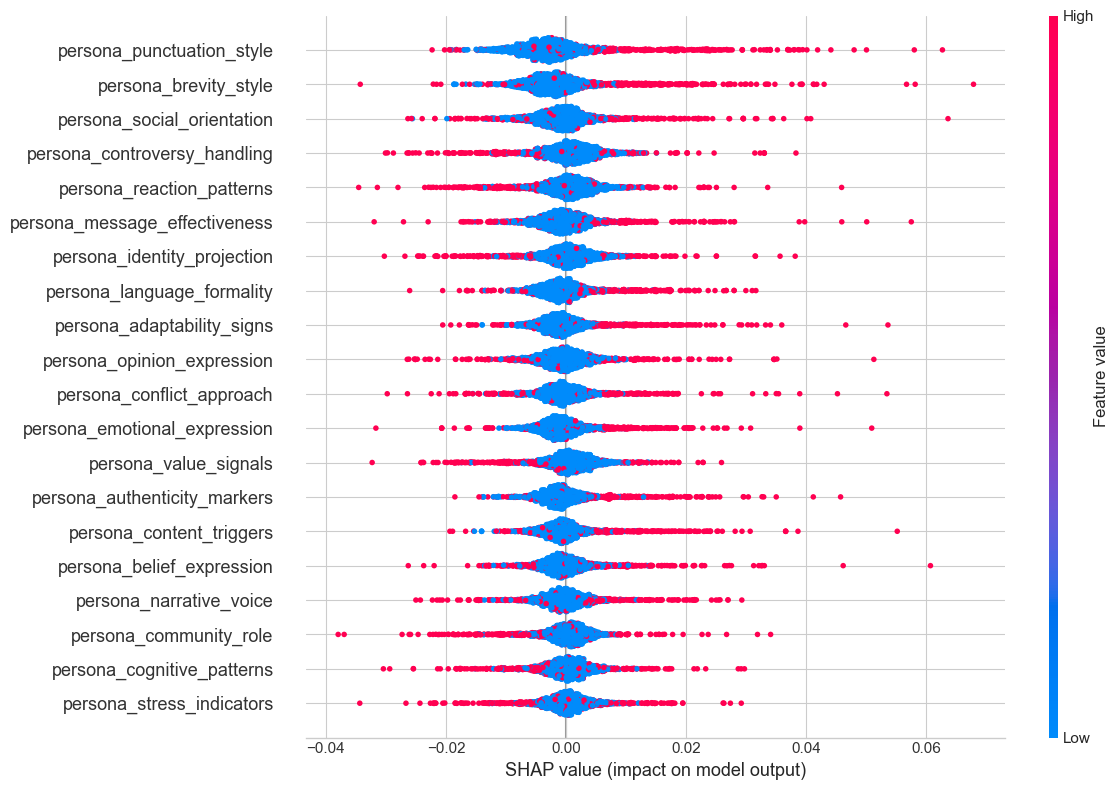

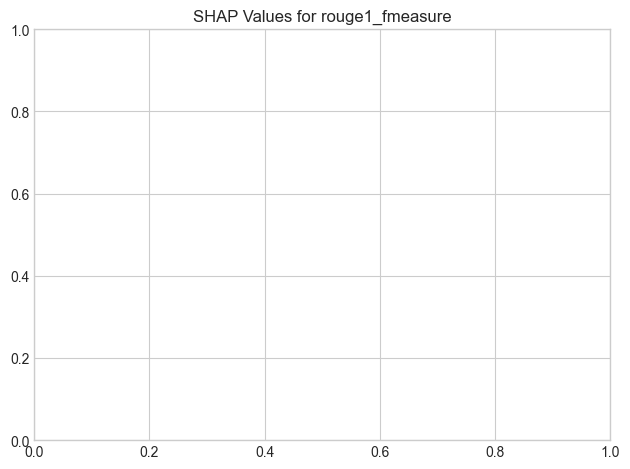


Dimensions with consistent high importance (high avg, low CV):
                                average        cv  importance_rank  \
persona_opinion_expression     0.053269  0.047103              2.0   
persona_value_signals          0.052609  0.044193              5.0   
persona_conflict_approach      0.053023  0.053634              3.0   
persona_emotional_expression   0.052765  0.065009              4.0   
persona_message_effectiveness  0.054665  0.091623              1.0   

                               consistency_rank  overall_score  
persona_opinion_expression                  2.0            4.0  
persona_value_signals                       1.0            6.0  
persona_conflict_approach                   4.0            7.0  
persona_emotional_expression                6.0           10.0  
persona_message_effectiveness              10.0           11.0  


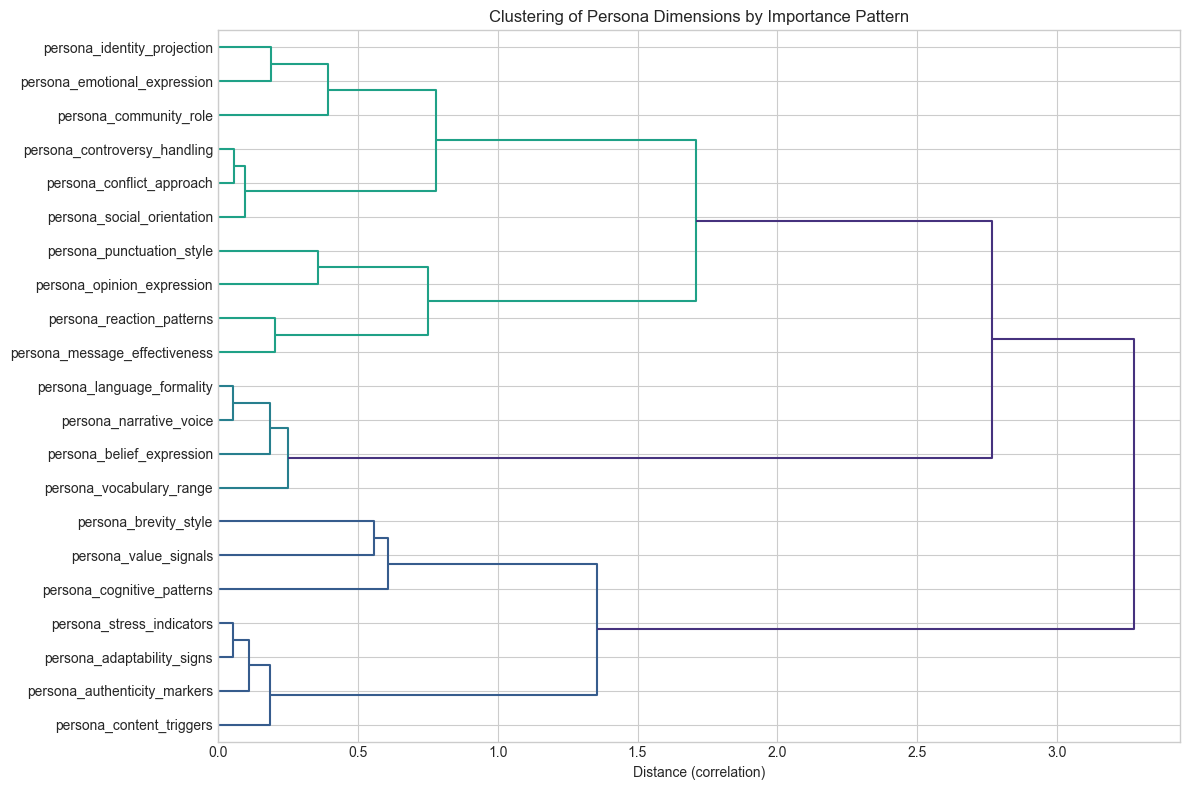


Bootstrap confidence intervals for top dimensions:

Metric: similarity_scores
persona_message_effectiveness: 0.0544 [0.0415, 0.0616]
persona_opinion_expression: 0.0506 [0.0350, 0.0593]
persona_conflict_approach: 0.0502 [0.0333, 0.0588]
persona_emotional_expression: 0.0524 [0.0412, 0.0595]
persona_value_signals: 0.0513 [0.0394, 0.0594]

Metric: rouge1_fmeasure


KeyboardInterrupt: 

In [5]:
## Comprehensive Analysis of Persona Dimensions Importance

warnings.filterwarnings('ignore')

# Set style for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 1. Load the data
df = pd.read_csv("/Users/christophhau/Desktop/Research_case/results/fine_tune03/combined_results.csv")
print(f"Data shape: {df.shape}")
df.head(3)

# 2. Identify persona dimensions
persona_cols = [col for col in df.columns if col.startswith('persona_') and col != 'persona_general_decription']
print(f"Number of persona dimensions: {len(persona_cols)}")
print("Persona dimensions:")
for col in persona_cols:
    print(f"- {col}")

# 3. Identify evaluation metrics
eval_metrics = ['similarity_scores', 'rouge1_fmeasure', 'rouge2_fmeasure', 
                'rougel_fmeasure' , 'llm_evaluation_authenticity','llm_evaluation_style_consistency','llm_evaluation_matching_intent']
# If you have LLM evaluation metrics in this dataset, you can add them here

# 4. Convert boolean persona columns to numerical (True=1, False=0)
for col in persona_cols:
    df[col] = df[col].map({True: 1, False: 0})

# 5. Check for missing values
missing_data = df[persona_cols + eval_metrics].isnull().sum()
print("\nMissing values:")
print(missing_data[missing_data > 0])

# 6. Get basic statistics for the evaluation metrics
print("\nEvaluation metrics statistics:")
df[eval_metrics].describe()

# 7. Distribution of persona dimensions
plt.figure(figsize=(14, 6))
df[persona_cols].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Frequency of Each Persona Dimension')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 8. Define a function to run Random Forest and get feature importance for each metric
def get_feature_importance(df, feature_cols, target_col):
    X = df[feature_cols]
    y = df[target_col]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Get predictions
    y_pred = rf.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importance
    importance = rf.feature_importances_
    
    # Return results
    return {
        'model': rf,
        'X_test': X_test,
        'importance': importance,
        'mse': mse,
        'r2': r2
    }

# 9. Run analysis for all metrics
results = {}
for metric in eval_metrics:
    print(f"\nAnalyzing {metric}...")
    results[metric] = get_feature_importance(df, persona_cols, metric)
    print(f"MSE: {results[metric]['mse']:.4f}")
    print(f"R²: {results[metric]['r2']:.4f}")




# 10. Create a DataFrame with feature importances for all metrics
importance_df = pd.DataFrame()
for metric in eval_metrics:
    importance_df[metric] = results[metric]['importance']
    
importance_df.index = persona_cols
importance_df['average'] = importance_df.mean(axis=1)
importance_df = importance_df.sort_values('average', ascending=False)

# 11. Visualize feature importances across metrics
plt.figure(figsize=(12, 8))
importance_df.drop('average', axis=1).plot(kind='bar', figsize=(14, 8))
plt.title('Feature Importance Across Metrics')
plt.ylabel('Importance')
plt.xlabel('Persona Dimension')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# 12. Heatmap of feature importances
plt.figure(figsize=(12, 10))
sns.heatmap(importance_df.drop('average', axis=1), annot=True, fmt='.4f', cmap='viridis')
plt.title('Feature Importance Heatmap')
plt.tight_layout()
plt.show()

from sklearn.inspection import permutation_importance

# Add to your notebook after the Random Forest analysis
# Calculate permutation importance for each metric
perm_results = {}
for metric in eval_metrics:
    print(f"\nCalculating permutation importance for {metric}...")
    model = results[metric]['model']
    X_test = results[metric]['X_test']
    y_test = df.loc[X_test.index, metric]
    
    # Calculate permutation importance
    perm_imp = permutation_importance(model, X_test, y_test, 
                                      n_repeats=10, random_state=42)
    
    perm_results[metric] = perm_imp.importances_mean
    
    # Compare with MDI importance
    comp_df = pd.DataFrame({
        'MDI_Importance': results[metric]['importance'],
        'Permutation_Importance': perm_imp.importances_mean
    }, index=persona_cols)
    
    comp_df = comp_df.sort_values('Permutation_Importance', ascending=False)
    print(comp_df.head(5))

# Create permutation importance DataFrame
perm_importance_df = pd.DataFrame()
for metric in eval_metrics:
    perm_importance_df[metric] = perm_results[metric]
    
perm_importance_df.index = persona_cols
perm_importance_df['average'] = perm_importance_df.mean(axis=1)
perm_importance_df = perm_importance_df.sort_values('average', ascending=False)

# Visualize permutation importance
plt.figure(figsize=(12, 8))
perm_importance_df.drop('average', axis=1).plot(kind='bar', figsize=(14, 8))
plt.title('Permutation Feature Importance Across Metrics')
plt.ylabel('Importance (mean decrease in performance)')
plt.xlabel('Persona Dimension')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()

# Compare MDI and permutation importance rankings
comparison = pd.DataFrame({
    'MDI_Rank': importance_df['average'].rank(ascending=False),
    'Permutation_Rank': perm_importance_df['average'].rank(ascending=False)
})
comparison['Rank_Difference'] = comparison['MDI_Rank'] - comparison['Permutation_Rank']
comparison = comparison.sort_values('MDI_Rank')

plt.figure(figsize=(12, 8))
plt.scatter(comparison['MDI_Rank'], comparison['Permutation_Rank'])
for idx, row in comparison.iterrows():
    plt.annotate(idx, (row['MDI_Rank'], row['Permutation_Rank']))
    
# Add diagonal line (perfect agreement)
max_rank = max(comparison['MDI_Rank'].max(), comparison['Permutation_Rank'].max())
plt.plot([0, max_rank], [0, max_rank], 'k--')
plt.xlabel('MDI Rank')
plt.ylabel('Permutation Rank')
plt.title('Comparison of Feature Ranking Methods')
plt.tight_layout()
plt.show()

# 13. SHAP analysis for the most important metric (highest R²)
best_metric = max(results, key=lambda x: results[x]['r2'])
print(f"\nPerforming SHAP analysis for {best_metric} (highest R²)...")

explainer = shap.TreeExplainer(results[best_metric]['model'])
shap_values = explainer(results[best_metric]['X_test'])

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, results[best_metric]['X_test'], plot_size=(12, 8))
plt.title(f'SHAP Values for {best_metric}')
plt.tight_layout()
plt.show()

# 14. Calculate consistency of importance across metrics
importance_df['std'] = importance_df.drop(['average', 'std'], axis=1, errors='ignore').std(axis=1)
importance_df['cv'] = importance_df['std'] / importance_df['average']  # Coefficient of variation

# 15. Dimensions with consistent high importance
print("\nDimensions with consistent high importance (high avg, low CV):")
consistency_df = importance_df[['average', 'cv']].copy()
consistency_df['importance_rank'] = consistency_df['average'].rank(ascending=False)
consistency_df['consistency_rank'] = consistency_df['cv'].rank()
consistency_df['overall_score'] = consistency_df['importance_rank'] + consistency_df['consistency_rank']
consistency_df = consistency_df.sort_values('overall_score')
print(consistency_df.head(5))

# 16. Dimension clustering based on impact patterns
# Transpose to get metrics as rows and dimensions as columns
importance_patterns = importance_df.drop(['average', 'std', 'cv'], axis=1, errors='ignore').T

# Calculate correlation distance
corr_distance = pdist(importance_patterns.T, 'correlation')

# Hierarchical clustering
linkage = hierarchy.linkage(corr_distance, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(
    linkage,
    labels=importance_patterns.columns,
    orientation='right'
)
plt.title('Clustering of Persona Dimensions by Importance Pattern')
plt.xlabel('Distance (correlation)')
plt.tight_layout()
plt.show()

# 17. Bootstrap confidence intervals for top 5 dimensions
top_dimensions = importance_df.index[:5].tolist()
print("\nBootstrap confidence intervals for top dimensions:")

n_bootstrap = 1000
alpha = 0.05  # 95% confidence interval

for metric in eval_metrics:
    print(f"\nMetric: {metric}")
    X = df[persona_cols]
    y = df[metric]
    
    bootstrap_importances = []
    
    for _ in range(n_bootstrap):
        # Sample with replacement
        indices = np.random.choice(len(X), len(X), replace=True)
        X_sample, y_sample = X.iloc[indices], y.iloc[indices]
        
        # Train model
        rf = RandomForestRegressor(n_estimators=50, random_state=None)
        rf.fit(X_sample, y_sample)
        
        # Store importances
        bootstrap_importances.append(rf.feature_importances_)
    
    # Convert to DataFrame
    bootstrap_df = pd.DataFrame(bootstrap_importances, columns=persona_cols)
    
    # Calculate confidence intervals
    for dim in top_dimensions:
        mean = bootstrap_df[dim].mean()
        ci_lower = np.percentile(bootstrap_df[dim], alpha/2 * 100)
        ci_upper = np.percentile(bootstrap_df[dim], (1-alpha/2) * 100)
        print(f"{dim}: {mean:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")

# 18. Calculate correlation between dimensions (to identify redundancy)
dim_corr = df[persona_cols].corr()

plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(dim_corr, dtype=bool))
sns.heatmap(dim_corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Between Persona Dimensions')
plt.tight_layout()
plt.show()

# 19. Summary: Top 5 dimensions overall
print("\nTop 5 most important persona dimensions (average across all metrics):")
for i, (dim, row) in enumerate(importance_df.head(5).iterrows(), 1):
    print(f"{i}. {dim}: {row['average']:.4f}")

# 20. Threshold-based classification of dimensions
threshold = importance_df['average'].mean() + 0.5 * importance_df['average'].std()
important_dims = importance_df[importance_df['average'] >= threshold]

print(f"\nDimensions above importance threshold ({threshold:.4f}):")
for dim, row in important_dims.iterrows():
    print(f"- {dim}: {row['average']:.4f}")